# Author: Kumar R.

# Project: Machine Learning

#### In this project I'm going to predict the overall rating of soccer player based on their attributes such as 'crossing', 'finishing etc

About the Dataset

The ultimate Soccer database for data analysis and machine learning

The dataset comes in the form of an SQL database and contains statistics of about 25,000 football 
matches, from the top football league of 11 European Countries. It covers seasons from 2008 to 
2016 and contains match statistics (i.e: scores, corners, fouls etc...) as well as the team 
formations, with player names and a pair of coordinates to indicate their position on the pitch.

->+25,000 matches

->+10,000 players

->11 European Countries with their lead championship

->Seasons 2008 to 2016

->Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the weekly updates

->Team line up with squad formation (X, Y coordinates)

->Betting odds from up to 10 providers

->Detailed match events (goal types, possession, corner, cross, fouls, cards etc...) for +10,000 matches

The dataset also has a set of about 35 statistics for each player, derived from EA Sports' FIFA 
video games. It is not just the stats that come with a new version of the game but also the weekly 
updates. So for instance if a player has performed poorly over a period of time and his stats get 
impacted in FIFA, you would normally see the same in the dataset.

In [1]:
#Import the required libraries
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Read Data from the Database into pandas

In [2]:
# Create your connection.
cnx = sqlite3.connect('database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [3]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

# EDA (Exploratory Data Analysis)

In [5]:
# WE can delete ID and date column as it doesn't effect on the output
df.drop(['id','player_fifa_api_id','player_api_id','date'], axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 38 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   overall_rating       183142 non-null  float64
 1   potential            183142 non-null  float64
 2   preferred_foot       183142 non-null  object 
 3   attacking_work_rate  180748 non-null  object 
 4   defensive_work_rate  183142 non-null  object 
 5   crossing             183142 non-null  float64
 6   finishing            183142 non-null  float64
 7   heading_accuracy     183142 non-null  float64
 8   short_passing        183142 non-null  float64
 9   volleys              181265 non-null  float64
 10  dribbling            183142 non-null  float64
 11  curve                181265 non-null  float64
 12  free_kick_accuracy   183142 non-null  float64
 13  long_passing         183142 non-null  float64
 14  ball_control         183142 non-null  float64
 15  acceleration     

## Handling Missing Data

In [7]:
#Get the index of those missing observations in label
miss_overall = df[df["overall_rating"].isnull()].index
miss_overall

Int64Index([   483,    983,   1752,   2089,   2482,   2498,   2540,   3283,
              4006,   4202,
            ...
            180806, 180905, 181115, 181888, 182208, 182587, 183249, 183309,
            183361, 183487],
           dtype='int64', length=836)

In [8]:
Total_observation = len(df['overall_rating'])
Total_missing = len(miss_overall)
print(f"Total observations: {Total_observation}")
print(f"Total Mising labels: {Total_missing}")

Total observations: 183978
Total Mising labels: 836


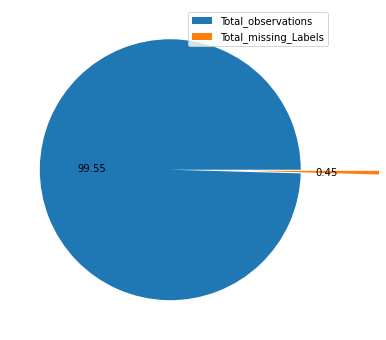

In [9]:
#Visualization of total missing labels
plt.figure(figsize=(6,6))
dat = (Total_observation,Total_missing)
expo = (0,0.6)
lab = ['Total_observations','Total_missing_Labels']
plt.pie(dat, autopct='%.2f',explode=expo)
plt.legend(lab)
plt.show()

Since the missing labels are only 0.45%, I'm deleting all the missing observations of the label data.

In [10]:
#Deleting the observations which doesn't have label
df.drop(df[df["overall_rating"].isnull()].index, axis=0, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183142 entries, 0 to 183977
Data columns (total 38 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   overall_rating       183142 non-null  float64
 1   potential            183142 non-null  float64
 2   preferred_foot       183142 non-null  object 
 3   attacking_work_rate  180748 non-null  object 
 4   defensive_work_rate  183142 non-null  object 
 5   crossing             183142 non-null  float64
 6   finishing            183142 non-null  float64
 7   heading_accuracy     183142 non-null  float64
 8   short_passing        183142 non-null  float64
 9   volleys              181265 non-null  float64
 10  dribbling            183142 non-null  float64
 11  curve                181265 non-null  float64
 12  free_kick_accuracy   183142 non-null  float64
 13  long_passing         183142 non-null  float64
 14  ball_control         183142 non-null  float64
 15  acceleration     

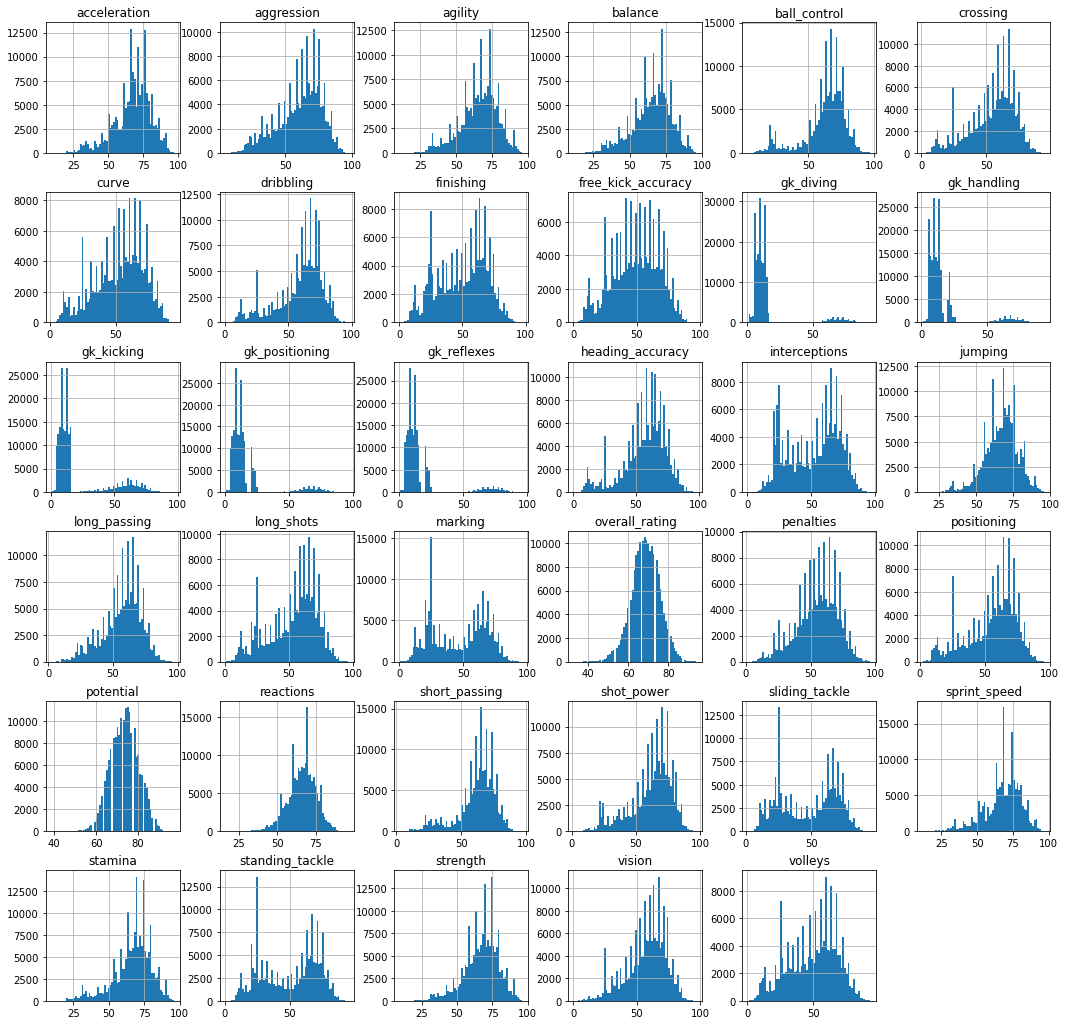

In [12]:
#Visualization of the distribustion of the data
df.hist(bins=70, figsize=(18,18))
plt.show()

Taking few columns to visualize how the data is distrucuted and check if any outliers present in it.

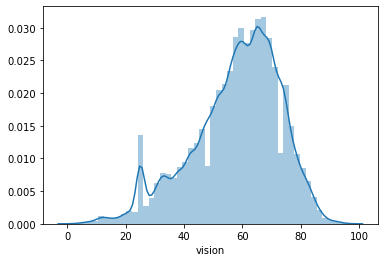

In [13]:
#Disatribution of VISION column
sns.distplot(df['vision'])
plt.show()

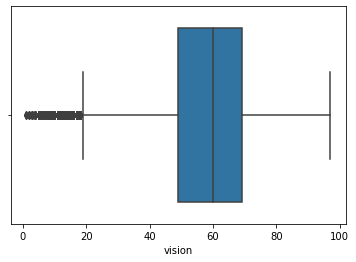

In [14]:
#Box plot pf VISION column
sns.boxplot(df['vision'])
plt.show()

Tha VISION column contains outliers and we need to handle the outliers to bring the data into normal distribution.

In [15]:
#Mean of the column before removing the outliers
df.vision.mean()

57.873549775191016

In [16]:
df.vision.describe()

count    181265.000000
mean         57.873550
std          15.144086
min           1.000000
25%          49.000000
50%          60.000000
75%          69.000000
max          97.000000
Name: vision, dtype: float64

In [17]:
#Function that can detect outlier 
def outlier(datacolumn):
    #Sort the data in assending order
    sorted(datacolumn)
    # First quantile 
    Q1 = datacolumn.quantile(0.25)
    #Third Quantile
    Q3 = datacolumn.quantile(0.75)
    #Inter Quantile Range
    IQR = (Q3-Q1)
    #Lower Quantile 
    LowerQuantile = Q1-(IQR*1.5)
    #Upper Quantile
    UpperQuantile = Q3+(IQR*1.5)
    return LowerQuantile, UpperQuantile

In [20]:
#Apply the outlier function on all the numerical columns of the dataset
for c in df.columns:
    if not df[c].dtype=='object':
        lr, ur = outlier(df[c])
        #Replace the outliers with the mean of the column
        df.loc[(df[c]<lr) | (df[c]>ur), c] = df[c].mean()
        #print(f'{c} : lr={lr}, ur={ur}')

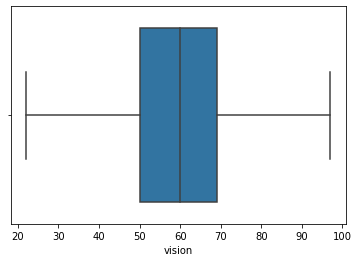

In [22]:
#Box plot of VISION column after I removed the outliers.
sns.boxplot(df.vision)
plt.show()

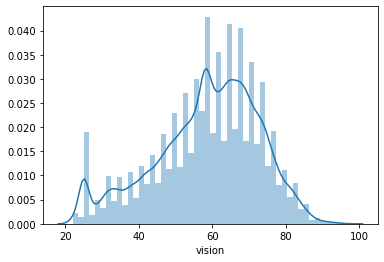

In [23]:
#Distribution of VISION column
sns.distplot(df.vision)
plt.show()

In [24]:
#Defining a function to check if there any missing data in features
def missing(data):
    for col in data.columns:
        if data[col].isnull().any():
            print(f"There are {data[col].isnull().sum()} in {col}, Data type {data[col].dtype}")
    else:
        print("There are no missing data")

In [25]:
#Apply the function on the datset
missing(df)

There are 2394 in attacking_work_rate, Data type object
There are 1877 in volleys, Data type float64
There are 1877 in curve, Data type float64
There are 1877 in agility, Data type float64
There are 1877 in balance, Data type float64
There are 1877 in jumping, Data type float64
There are 1877 in vision, Data type float64
There are 1877 in sliding_tackle, Data type float64
There are no missing data


In [26]:
#Handling categorical columns
df['attacking_work_rate'].value_counts()

medium    125070
high       42823
low         8569
None        3639
norm         348
y            106
le           104
stoc          89
Name: attacking_work_rate, dtype: int64

In [27]:
#Mode of the column is,
df['attacking_work_rate'].mode()

0    medium
dtype: object

In [28]:
#Filling the missing observations of 'attacking_work_rate' with the mode of the column.
df['attacking_work_rate'].fillna(df['attacking_work_rate'].mode()[0], inplace=True)

In [29]:
#Selecting the remaining numeric columns 
col = ('volleys','curve','agility','balance','jumping','vision','sliding_tackle')

In [30]:
#Filling the missing observations of the numeric columns with their 'Mean' using Sci-kit learn package.
from sklearn.impute import SimpleImputer
miss = SimpleImputer(missing_values=np.nan, strategy='mean')
df.loc[:,(col)] = miss.fit_transform(df.loc[:,(col)])

In [31]:
#Cross checking for any missing observations in the data
missing(df)

There are no missing data


### Handling the categorical columns.

In [32]:
df['preferred_foot'].value_counts()

right    138409
left      44733
Name: preferred_foot, dtype: int64

In [33]:
#What is attacking Work Rate (AWR) ?
# - How a player participates in attacks. Rated as low, medium and high.
df['attacking_work_rate'].value_counts()

medium    127464
high       42823
low         8569
None        3639
norm         348
y            106
le           104
stoc          89
Name: attacking_work_rate, dtype: int64

As per the domine, attacking_work_rate and defensive_work_rate can only be categorised as Low, Medium and High. Therefore, I'm going replace other categories as Low,Medium or High

In [34]:
#Replacing the unwated data
df['attacking_work_rate'].replace({'None':'low','norm':'medium','le':'low','y':'high','stoc':'medium'}, inplace=True)

In [35]:
df['attacking_work_rate'].value_counts()

medium    127901
high       42929
low        12312
Name: attacking_work_rate, dtype: int64

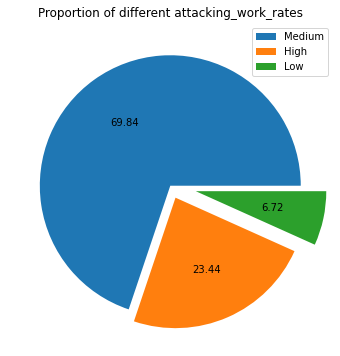

In [36]:
#visualization of the proportion of different attacking_work_rates
plt.figure(figsize=(6,6))
dat = (df['attacking_work_rate'].value_counts())
expo = (0,0.1,0.2)
lab = ['Medium','High','Low']
plt.pie(dat, autopct='%.2f',explode=expo)
plt.title("Proportion of different attacking_work_rates")
plt.legend(lab)
plt.show()

In [37]:
#What is Defensive Work Rate (DWR) ?
# - How a player participates in defensive plays. Rated as low, medium and high.
df['defensive_work_rate'].value_counts()

medium    130846
high       27041
low        18432
_0          2394
o           1550
1            441
ormal        348
2            342
3            258
5            234
7            217
6            197
0            197
9            152
4            116
es           106
ean          104
tocky         89
8             78
Name: defensive_work_rate, dtype: int64

Replcating the other data in 'defensive_work_rate' which is out of domine with the required categories.

In [38]:
#Replacing the data that is out of domine.
df['defensive_work_rate'].replace({'_0':'low',
                                   'o':'low','1':'low','ormal':'medium',
                                   '2':'low','3':'low','5':'medium','7':'medium',
                                   '0':'low','6':'medium','9':'high','4':'medium',
                                  'es':'high','ean':'high','tocky':'high','8':'high'}, inplace=True)

In [39]:
#Final data categories
df['defensive_work_rate'].value_counts()

medium    131958
high       27570
low        23614
Name: defensive_work_rate, dtype: int64

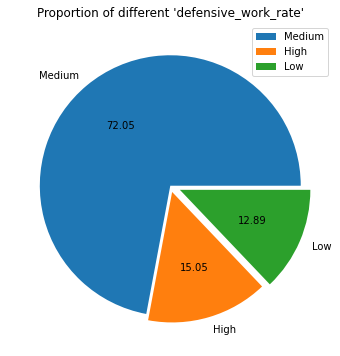

In [40]:
#Visualization of the proportion of different 'defensive_work_rate'
dat = df['defensive_work_rate'].value_counts()
plt.figure(figsize=(6,6))
ex = (0,0.05,0.08)
labe = ['Medium','High','Low']
plt.pie(dat, explode=ex,labels=labe, autopct='%.2f')
plt.title("Proportion of different 'defensive_work_rate'")
plt.legend()
plt.show()

In [41]:
#Using get_dummies to convert categorical columns into numeric.
finalDataset = pd.get_dummies(df) #Sci-kit learn package can also be used if we want to deploy the model.
finalDataset.head()

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,gk_positioning,gk_reflexes,preferred_foot_left,preferred_foot_right,attacking_work_rate_high,attacking_work_rate_low,attacking_work_rate_medium,defensive_work_rate_high,defensive_work_rate_low,defensive_work_rate_medium
0,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,8.0,8.0,0,1,0,0,1,0,0,1
1,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,8.0,8.0,0,1,0,0,1,0,0,1
2,62.0,66.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,8.0,8.0,0,1,0,0,1,0,0,1
3,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,...,7.0,7.0,0,1,0,0,1,0,0,1
4,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,...,7.0,7.0,0,1,0,0,1,0,0,1


In [42]:
finalDataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183142 entries, 0 to 183977
Data columns (total 43 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   overall_rating              183142 non-null  float64
 1   potential                   183142 non-null  float64
 2   crossing                    183142 non-null  float64
 3   finishing                   183142 non-null  float64
 4   heading_accuracy            183142 non-null  float64
 5   short_passing               183142 non-null  float64
 6   volleys                     183142 non-null  float64
 7   dribbling                   183142 non-null  float64
 8   curve                       183142 non-null  float64
 9   free_kick_accuracy          183142 non-null  float64
 10  long_passing                183142 non-null  float64
 11  ball_control                183142 non-null  float64
 12  acceleration                183142 non-null  float64
 13  sprint_speed  

### Feature selection

In [43]:
#Method-1

#Checking the correlation of the final dataset
finalDataset.corr()

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,gk_positioning,gk_reflexes,preferred_foot_left,preferred_foot_right,attacking_work_rate_high,attacking_work_rate_low,attacking_work_rate_medium,defensive_work_rate_high,defensive_work_rate_low,defensive_work_rate_medium
overall_rating,1.000000,0.736827,0.361459,0.311823,0.392566,0.601956,0.346404,0.442589,0.343403,0.333992,...,-0.047284,-0.036980,-0.003871,0.003871,0.149254,-0.018716,-0.127550,0.129420,0.027486,-0.123661
potential,0.736827,1.000000,0.281009,0.279924,0.239532,0.492330,0.293749,0.424433,0.288770,0.257246,...,0.032950,0.035670,0.001548,-0.001548,0.144034,-0.050129,-0.105593,0.069993,0.030666,-0.078679
crossing,0.361459,0.281009,1.000000,0.505376,-0.069925,0.553624,0.567020,0.564787,0.718932,0.649236,...,-0.146087,-0.154408,0.172408,-0.172408,0.277261,-0.107970,-0.197003,0.035428,0.074344,-0.083754
finishing,0.311823,0.279924,0.505376,1.000000,0.070193,0.361510,0.847360,0.620660,0.687971,0.632248,...,-0.134676,-0.140989,-0.011565,0.011565,0.282821,-0.130848,-0.189653,-0.028085,0.243666,-0.159595
heading_accuracy,0.392566,0.239532,-0.069925,0.070193,1.000000,0.079169,0.075015,-0.139128,-0.063598,-0.036743,...,-0.016692,-0.012002,-0.062228,0.062228,-0.022713,0.104347,-0.035969,0.153521,-0.028124,-0.101336
short_passing,0.601956,0.492330,0.553624,0.361510,0.079169,1.000000,0.426104,0.557914,0.510891,0.514316,...,-0.073867,-0.068780,0.023197,-0.023197,0.141712,-0.100521,-0.075955,0.099683,0.006484,-0.084279
volleys,0.346404,0.293749,0.567020,0.847360,0.075015,0.426104,1.000000,0.597569,0.752248,0.678982,...,-0.123325,-0.125830,0.012136,-0.012136,0.268992,-0.109948,-0.188291,0.007842,0.221954,-0.172010
dribbling,0.442589,0.424433,0.564787,0.620660,-0.139128,0.557914,0.597569,1.000000,0.595360,0.507205,...,-0.082491,-0.085090,0.039144,-0.039144,0.295260,-0.208533,-0.158748,-0.072767,0.158915,-0.060694
curve,0.343403,0.288770,0.718932,0.687971,-0.063598,0.510891,0.752248,0.595360,1.000000,0.793008,...,-0.170779,-0.173801,0.128362,-0.128362,0.276506,-0.112401,-0.193889,0.003293,0.161173,-0.122991
free_kick_accuracy,0.333992,0.257246,0.649236,0.632248,-0.036743,0.514316,0.678982,0.507205,0.793008,1.000000,...,-0.157513,-0.160853,0.124433,-0.124433,0.207397,-0.074308,-0.150884,0.022586,0.144035,-0.125567


In [44]:
#Seperating the label and feature from the dataset.
label =finalDataset.pop("overall_rating").values

In [45]:
#Method-2

#ANOVA

In [46]:
featuresforAnova = finalDataset.iloc[:,:].values
#finalDataset.columns

In [47]:
# Anova test for feature selection
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_regression

selectfeaturefromAnova = SelectPercentile(percentile=50, score_func=f_regression)
selectfeaturefromAnova.fit(featuresforAnova, label)
c = finalDataset.columns
ans = selectfeaturefromAnova.get_support()
print(finalDataset.columns)
print(selectfeaturefromAnova.get_support())

Index(['potential', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes', 'preferred_foot_left', 'preferred_foot_right',
       'attacking_work_rate_high', 'attacking_work_rate_low',
       'attacking_work_rate_medium', 'defensive_work_rate_high',
       'defensive_work_rate_low', 'defensive_work_rate_medium'],
      dtype='object')
[ True  True  True  True  True  True  True  True  True  True  True False
 False False  True False  True  True  True  True  True  True False  True
  True  True False False False False False False False

After analyzing both the methods, I'm deleting the common columns of both the methods.

In [48]:
#Creating a dataFrame for the columns with the boolean output of ANOVA
result = pd.DataFrame(ans, index=c)

In [49]:
result.head()

,0
potential,True
crossing,True
finishing,True
heading_accuracy,True
short_passing,True


#### Visualization of the relationship between few features and the label

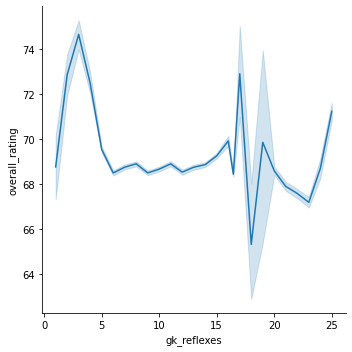

In [50]:
sns.relplot('gk_reflexes','overall_rating', data=df, kind='line')
plt.show()

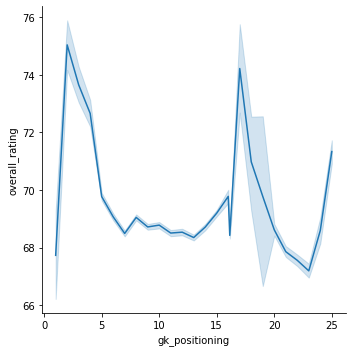

In [51]:
sns.relplot('gk_positioning','overall_rating', data=df, kind='line')
plt.show()

The above two features does not have much effect on the output.

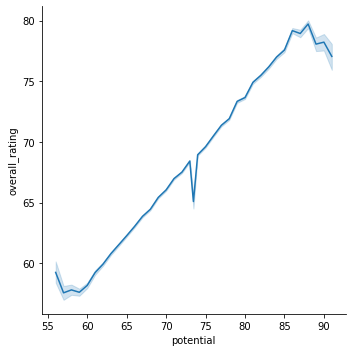

In [52]:
sns.relplot('potential','overall_rating', data=df, kind='line')
plt.show()

'potential' feature has linear relationship with 'overall_rating'. Also, it has 76% correlation with the output.

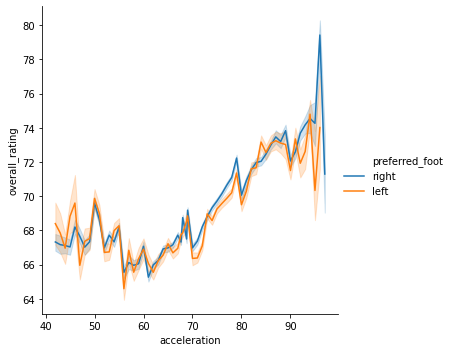

In [55]:
sns.relplot('acceleration','overall_rating',hue='preferred_foot', data=df, kind='line')
plt.show()

In [56]:
#Select the columns that are to be deleted (Feature Selection).
delete_col = result[result[0]==False].index
delete_col

Index(['acceleration', 'sprint_speed', 'agility', 'balance', 'interceptions',
       'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes',
       'preferred_foot_left', 'preferred_foot_right',
       'attacking_work_rate_high', 'attacking_work_rate_low',
       'attacking_work_rate_medium', 'defensive_work_rate_high',
       'defensive_work_rate_low', 'defensive_work_rate_medium'],
      dtype='object')

In [57]:
#Dropping out the columns which have been selected to delete.
finalDataset.drop(delete_col,axis=1, inplace=True)

In [58]:
finalDataset.head()

,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,...,reactions,shot_power,jumping,stamina,strength,long_shots,aggression,positioning,vision,penalties
0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,...,47.0,55.0,58.0,54.0,76.0,35.0,71.0,45.0,54.0,48.0
1,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,...,47.0,55.0,58.0,54.0,76.0,35.0,71.0,45.0,54.0,48.0
2,66.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,...,47.0,55.0,58.0,54.0,76.0,35.0,63.0,45.0,54.0,48.0
3,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,...,46.0,54.0,58.0,54.0,76.0,34.0,62.0,44.0,53.0,47.0
4,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,...,46.0,54.0,58.0,54.0,76.0,34.0,62.0,44.0,53.0,47.0


In [59]:
finalDataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183142 entries, 0 to 183977
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   potential           183142 non-null  float64
 1   crossing            183142 non-null  float64
 2   finishing           183142 non-null  float64
 3   heading_accuracy    183142 non-null  float64
 4   short_passing       183142 non-null  float64
 5   volleys             183142 non-null  float64
 6   dribbling           183142 non-null  float64
 7   curve               183142 non-null  float64
 8   free_kick_accuracy  183142 non-null  float64
 9   long_passing        183142 non-null  float64
 10  ball_control        183142 non-null  float64
 11  reactions           183142 non-null  float64
 12  shot_power          183142 non-null  float64
 13  jumping             183142 non-null  float64
 14  stamina             183142 non-null  float64
 15  strength            183142 non-nul

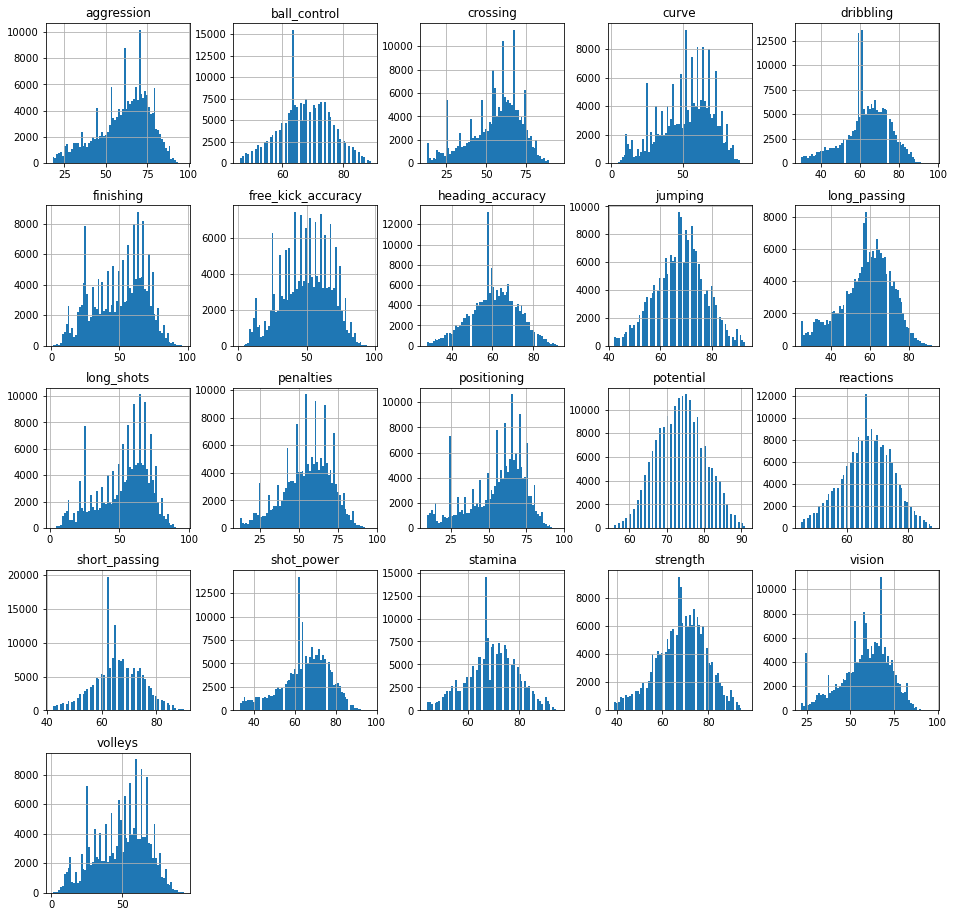

In [60]:
finalDataset.hist(bins=70, figsize=(16,16))
plt.show()

In [71]:
#Select the features
feature = finalDataset.iloc[:,:].values

In [72]:
#Standardise the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
feature = scaler.fit_transform(feature)

### Checking the multicollinearity of the features

In [63]:
#Using variance_inflation_factor to find the multicollinearity. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(feature, i) for i in range(feature.shape[1])]
vif["Features"] = finalDataset.columns

In [64]:
vif

,VIF,Features
0,1.794936,potential
1,2.744280,crossing
2,5.722797,finishing
3,1.924457,heading_accuracy
4,3.299598,short_passing
5,4.920276,volleys
6,3.511119,dribbling
7,4.408173,curve
8,3.604231,free_kick_accuracy
9,2.703285,long_passing


In [65]:
#Select the columns which have VIF less than 5.
final_col = vif[vif['VIF']<=5]

In [66]:
final_column = final_col.Features.to_list()

In [73]:
#Selecting those columns as a final featues.
feature_vif = finalDataset.loc[:,final_column].values

In [76]:
feature_vif.ndim

2

In [77]:
feature.ndim

2

In [78]:
label.ndim

1

### Using cross_validation method to check which algoarithm gives best results on the dataset I'm working.

In [79]:
from sklearn.linear_model import LinearRegression
Linear_reg = LinearRegression()
from sklearn.tree import DecisionTreeRegressor
D_tree = DecisionTreeRegressor()

from xgboost import XGBRegressor
xg_reg = XGBRegressor()
from sklearn.ensemble import RandomForestRegressor
R_forest = RandomForestRegressor()

In [81]:
#Features from VIF
models = [Linear_reg,D_tree,xg_reg,R_forest]

from sklearn.model_selection import cross_val_score
for model in models:
    
    score = cross_val_score(model,
                           feature_vif,
                           label,
                           cv=10)
    print(model)
    print("The minimum score {}".format(np.min(score)))
    print("Average score {}".format(np.average(score)))
    print("The maximum score {}".format(np.max(score)))
    print('-------------------------------------------')

LinearRegression()
The minimum score 0.7571178037295876
Average score 0.7708515723167805
The maximum score 0.7915283626749815
-------------------------------------------
DecisionTreeRegressor()
The minimum score 0.6919553575811463
Average score 0.7093801224910552
The maximum score 0.7419156084987635
-------------------------------------------
XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)
The minimum score 0.847173970696

In [82]:
#Before vif (feature)
models = [Linear_reg,D_tree,xg_reg,R_forest]

from sklearn.model_selection import cross_val_score
for model in models:
    
    score = cross_val_score(model,
                           feature,
                           label,
                           cv=10)
    print(model)
    print("The minimum score {}".format(np.min(score)))
    print("Average score {}".format(np.average(score)))
    print("The maximum score {}".format(np.max(score)))
    print('-------------------------------------------')

LinearRegression()
The minimum score 0.7586393364663124
Average score 0.7715276186127165
The maximum score 0.7919254281103235
-------------------------------------------
DecisionTreeRegressor()
The minimum score 0.6968761540054536
Average score 0.7157598328737781
The maximum score 0.7498640059802566
-------------------------------------------
XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)
The minimum score 0.859056497714

Models are performing better on the original features than feature_vif(features after removing multicollinearity). Therefore, I'm using "feature" to train the model.

### Use the features Before VIF since the above Accuracy is more

### Random Forest

In [83]:
from sklearn.model_selection import train_test_split
for i in range(6):
    
    x_train,x_test,y_train,y_test = train_test_split(feature,label,test_size=0.2, random_state=i)
    
    from sklearn.ensemble import RandomForestRegressor
    modelR = RandomForestRegressor()
    
    modelR.fit(x_train,y_train)
    
    train_score = modelR.score(x_train,y_train)
    test_score = modelR.score(x_test,y_test)
    
    #if test_score>train_score:
    print(f"test score {test_score}, train score {train_score}, RS {i}")

test score 0.9554712649008863, train score 0.9924333884704438, RS 0
test score 0.9550651413504133, train score 0.9923893808882001, RS 1
test score 0.9554170801903803, train score 0.992464833473577, RS 2
test score 0.9531027088276097, train score 0.992364343934506, RS 3
test score 0.9541493680116843, train score 0.9923861234267314, RS 4
test score 0.9549083151603988, train score 0.9924454416561392, RS 5


# Do not execute below code

In [39]:
# Initialize the algo
from sklearn.ensemble import RandomForestRegressor
modelR = RandomForestRegressor()

#Initialize K-Fold method
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10,
             random_state=7,
             shuffle=True)
#Initialize for loop
i=0
for train,test in kfold.split(feature):
    i=i+1
    x_train,x_test = feature[train],feature[test]
    y_train,y_test = label[train],label[test]
    
    
    modelR.fit(x_train,y_train)
    
    #if model.score(x_test,y_test)>=0.95:
    print("Test Score: {}, train score: {}, for Sample Split: {}".format(model.score(x_test,y_test),model.score(x_train,y_train),i))
        

Test Score: 0.9597830836201338, train score: 0.9929141865499941, for Sample Split: 1
Test Score: 0.9595574805438827, train score: 0.9929474425719625, for Sample Split: 2
Test Score: 0.9588186558581697, train score: 0.9929554279050017, for Sample Split: 3
Test Score: 0.9608057111830041, train score: 0.9929176607714582, for Sample Split: 4
Test Score: 0.960645942823553, train score: 0.9929568946309203, for Sample Split: 5
Test Score: 0.9593700697431119, train score: 0.9929240181560809, for Sample Split: 6
Test Score: 0.9595081535441692, train score: 0.9928220655769074, for Sample Split: 7
Test Score: 0.9619547822406048, train score: 0.9929175624552131, for Sample Split: 8
Test Score: 0.9605974804454327, train score: 0.9928528814855803, for Sample Split: 9
Test Score: 0.9575898393855726, train score: 0.9928827428560392, for Sample Split: 10


### Hyper Parameter Tuning - Random Forest

In [54]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit, RandomizedSearchCV

cv = ShuffleSplit(test_size=0.2, random_state=0)

param_grid = {'max_features':['sqrt', 'log2', 10],
              'max_depth':[9, 11, 13]}                 

grid = GridSearchCV(modelR, param_grid=param_grid, cv=cv)

In [55]:
grid.fit(x_train, y_train) 

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None),
             estimator=RandomForestRegressor(),
             param_grid={'max_depth': [9, 11, 13],
                         'max_features': ['sqrt', 'log2', 10]})

In [56]:
grid.best_score_

0.9458596401288115

In [57]:
grid.best_estimator_

RandomForestRegressor(max_depth=13, max_features=10)

Since the Random Forest giving better accuracy( greater than 94.5%) without hyper parameter, I will not be trainig the model with hyper parameters instead I would use the above model to deploy.

## Decision Tree

In [84]:
from sklearn.model_selection import train_test_split
for i in range(12):
    
    x_train,x_test,y_train,y_test = train_test_split(feature,label,test_size=0.2, random_state=i)
    
    from sklearn.tree import DecisionTreeRegressor
    model_DT = DecisionTreeRegressor()
    
    model_DT.fit(x_train,y_train)
    
    train_score = model_DT.score(x_train,y_train)
    test_score = model_DT.score(x_test,y_test)
    
    #if test_score>train_score:
    print(f"test score {test_score}, train score {train_score}, RS {i}")

test score 0.9147529797827847, train score 0.9982235362025955, RS 0
test score 0.9127414760992457, train score 0.998201770531, RS 1
test score 0.9183863923774459, train score 0.9983381873505228, RS 2
test score 0.913072190661725, train score 0.998183035924238, RS 3
test score 0.9173033165138964, train score 0.9982999655314452, RS 4
test score 0.9185558736515884, train score 0.9983066181969672, RS 5
test score 0.9147881473574716, train score 0.9981791473047097, RS 6
test score 0.9170792732687992, train score 0.9981806969480481, RS 7
test score 0.9177733244571582, train score 0.9982899111064576, RS 8
test score 0.9153473912538922, train score 0.9981768055391375, RS 9
test score 0.9173155623079711, train score 0.9981829321084875, RS 10
test score 0.914025868833674, train score 0.9983140832654807, RS 11


### Hyper parameter Tuning - Decision Tree

In [87]:
from sklearn.model_selection import ShuffleSplit, GridSearchCV
cv = ShuffleSplit(n_splits=10, random_state=42)        #cross validation

param_grid = {'max_depth': [3, 5, 7, 9, 13],
             'criterion': ['mse', 'friedman_mse']}

grid = GridSearchCV(model_DT, param_grid=param_grid, cv=cv)

In [88]:
grid.fit(x_train,y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size=None, train_size=None),
             estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse'],
                         'max_depth': [3, 5, 7, 9, 13]})

In [89]:
grid.best_score_

0.86495842099397

In [90]:
grid.best_params_

{'criterion': 'friedman_mse', 'max_depth': 13}

In [91]:
grid.best_estimator_

DecisionTreeRegressor(criterion='friedman_mse', max_depth=13)

In [92]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10,
             random_state=7,
             shuffle=True)
#Initialize for loop
i=0
for train,test in kfold.split(feature):
    i=i+1
    
    x_train,x_test = feature[train],feature[test]
    y_train,y_test = label[train],label[test]
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.ensemble import BaggingRegressor
    model_DT = DecisionTreeRegressor(criterion='friedman_mse', max_depth=13)
    modelBagtree = BaggingRegressor(n_estimators=11,base_estimator=model_DT,random_state=7)
    
    modelBagtree.fit(x_train,y_train)
    
    train_score = modelBagtree.score(x_train,y_train)
    test_score = modelBagtree.score(x_test,y_test)
    
    #if test_score>train_score:
    print(f"test score {test_score}, train score {train_score}, RS {i}")

test score 0.9052603108441731, train score 0.9263501886025088, RS 1
test score 0.9044322118000419, train score 0.926485566370181, RS 2
test score 0.9011905077567084, train score 0.9260590407594145, RS 3
test score 0.9064932189367867, train score 0.9275532955935366, RS 4
test score 0.9020398477984954, train score 0.924835474654694, RS 5
test score 0.9026029000425501, train score 0.9268601315175758, RS 6
test score 0.9023418852566601, train score 0.9262363436158336, RS 7
test score 0.9054646409947322, train score 0.9259713360173913, RS 8
test score 0.906818292016952, train score 0.9264741630755948, RS 9
test score 0.8987145011223941, train score 0.9262715376570793, RS 10


## XG Boost

In [93]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
for i in range(10):
    
    x_train,x_test,y_train,y_test = train_test_split(feature,label,test_size=0.25, random_state=i)
    
    from xgboost import XGBRegressor
    
    #from sklearn.ensemble import BaggingRegressor
    model_XG = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.3, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
    #modelBagtree = BaggingRegressor(n_estimators=11,base_estimator=modelR,random_state=7)
    
    model_XG.fit(x_train,y_train)
    
    train_score = model_XG.score(x_train,y_train)
    test_score = model_XG.score(x_test,y_test)
    
    #if test_score>train_score:
    print(f"test score {test_score}, train score {train_score}, RS {i}")

[20:50:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[20:50:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
test score 0.9199291278323963, train score 0.9447666550977033, RS 0
[20:50:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[20:51:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
test score 0.9205374313085176, train score 0.9446984520875003, RS 1
[20:51:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor 

Out of all Three algoarithm namely:

    1) Random Forest (modelR)
    
    2) Decision Tree (model_DT)
    
    3) XGBoost Regressor (model_XG),
    
Random Forest (ModelR) gave better accuracy than the other models. Therefore, I'm going to train Random Forest(modelR) as final model using K-Fold method.

### Final Model

In [97]:
# Initialize the algo
from sklearn.ensemble import RandomForestRegressor
modelR = RandomForestRegressor()

#Initialize K-Fold method
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10,
             random_state=7,
             shuffle=True)
#Initialize for loop
i=0
for train,test in kfold.split(feature):
    i=i+1
    if i== 8:
        x_train,x_test = feature[train],feature[test]
        y_train,y_test = label[train],label[test]
    
        #Training the model
        modelR.fit(x_train,y_train)
    
        print("Test Score: {}, train score: {}".format(modelR.score(x_test,y_test),modelR.score(x_train,y_train)))
        

Test Score: 0.9613940551117213, train score: 0.9928883243907604


## Model Deployment

In [101]:
#Import the pickle library to deploy the model
import pickle
#Saving the standard scaler to standardize the unknown features 
pickle.dump(scaler, open("Standardization_feature.model", 'wb'))
#Saving the model as "RandomForest_MLProject.model".
pickle.dump(modelR, open("RandomForest_MLProject.model",'wb'))

.

.

.

.

.
# Thank you !